### pip install & import

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#import pandas_profiling
import datetime

In [2]:
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import MinMaxScaler

from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestRegressor

# from xgboost import XGBRFRegressor
from sklearn.model_selection import cross_validate

### 최종데이터 불러오기

In [3]:
# movie_final_회귀 = pd.read_csv('../3_merge_top300/movie_final_reg.csv',encoding='utf-8')
movie_final_분류 = pd.read_csv('../3_merge_top300/movie_final_cls.csv',encoding='utf-8')

## 스케일링

In [4]:
from sklearn.preprocessing import RobustScaler

# 객체생성
robust_scaler = RobustScaler()

# *** 만약 특정 열의 스케일링을 하고 싶은 경우 ***
A_n = robust_scaler.fit_transform(movie_final_분류['전국 스크린수'].values.reshape(-1,1))
movie_final_분류.insert(0, '전국 스크린수_scaled', A_n)
# movie_final_분류.drop(['전국 스크린수'], axis=1, inplace=False)

A_n1 = robust_scaler.fit_transform(movie_final_분류['총 관객수'].values.reshape(-1,1))
movie_final_분류.insert(0, '총 관객수_scaled', A_n1)
# movie_final_분류.drop(['총 관객수'], axis=1, inplace=False)

In [5]:
movie_final_분류.columns

Index(['총 관객수_scaled', '전국 스크린수_scaled', 'Unnamed: 0', '순번', '영화명', '감독',
       '배급사', '개봉일', '영화형태', '국적', '전국 스크린수', '전국 매출액', '전국 관객수', '서울 매출액',
       '서울 관객수', '장르', '등급', '영화구분', '연도', '월', '계절', '총 관객수', '코로나', '출연',
       '평점', '감독_흥행', '배급사_흥행', '주연배우_흥행'],
      dtype='object')

## 라벨링

In [6]:
from sklearn.preprocessing import LabelEncoder

le_form = LabelEncoder()
le_nation = LabelEncoder()
le_genre = LabelEncoder()
le_rating = LabelEncoder()
le_class = LabelEncoder()
le_season = LabelEncoder()
le_year = LabelEncoder()

movie_labels = movie_final_분류.copy()
movie_labels['영화형태'] = le_form.fit_transform(movie_final_분류['영화형태'])
movie_labels['국적'] = le_nation.fit_transform(movie_final_분류['국적'])
movie_labels['장르'] = le_genre.fit_transform(movie_final_분류['장르'])
movie_labels['등급'] = le_rating.fit_transform(movie_final_분류['등급'])
movie_labels['영화구분'] = le_class.fit_transform(movie_final_분류['영화구분'])
movie_labels['계절'] = le_season.fit_transform(movie_final_분류['계절'])
movie_labels['연도'] = le_year.fit_transform(movie_final_분류['연도'])
movie_labels.drop(['Unnamed: 0'],axis=1,inplace=True)
movie_labels.head(3)


,총 관객수_scaled,전국 스크린수_scaled,순번,영화명,감독,배급사,개봉일,영화형태,국적,전국 스크린수,...,연도,월,계절,총 관객수,코로나,출연,평점,감독_흥행,배급사_흥행,주연배우_흥행
0,0.027876,1.397641,1,명량,김한민,씨제이이엔엠,2014-07-30,0,7,1587,...,7,7,3,215068958,0,"['최민식', '류승룡', '조진웅']",8.44,9,10,20
1,0.216263,2.056445,2,극한직업,이병헌,씨제이이엔엠,2019-01-23,0,7,1978,...,12,1,1,226678777,0,"['류승룡', '이하늬', '진선규', '이동휘', '공명']",8.51,4,10,16
2,0.105881,1.945240,3,신과함께-죄와 벌,김용화,롯데엔터테인먼트,2017-12-20,0,7,1912,...,10,12,1,219876227,0,"['하정우', '차태현', '주지훈', '김향기', '김동욱', '마동석']",7.83,9,9,40


In [7]:
import numpy as np

movie_labels['분류클래스'] = np.where((movie_labels['전국 관객수'].values<1000000), 0, 
                                 np.where((movie_labels['전국 관객수'].values>1000000) & (movie_labels['전국 관객수'].values<1400000), 1,
                                          np.where((movie_labels['전국 관객수'].values>1400000) & (movie_labels['전국 관객수'].values<2000000), 2,
                                                   np.where((movie_labels['전국 관객수'].values>2000000) & (movie_labels['전국 관객수'].values<3000000), 3,
                                                            np.where((movie_labels['전국 관객수'].values>3000000) & (movie_labels['전국 관객수'].values<5000000), 4, 5))))
)
movie_labels['분류클래스'].unique()

array([5, 4, 3, 2, 1, 0])

## 변수 정리   
사용하지 않는 컬럼 제거


In [8]:
# 사용하지 않는 컬럼 제거

not_used = ['영화명', '감독', '배급사', '영화형태', '개봉일', '영화구분', '월']

movie_DL = movie_labels.drop(not_used, axis=1)
movie_DL.head()

,총 관객수_scaled,전국 스크린수_scaled,순번,국적,전국 스크린수,전국 매출액,전국 관객수,서울 매출액,서울 관객수,장르,...,연도,계절,총 관객수,코로나,출연,평점,감독_흥행,배급사_흥행,주연배우_흥행,분류클래스
0,0.027876,1.397641,1,7,1587,135748398910,17613682,"33,121,225,810","4,163,666",9,...,7,3,215068958,0,"['최민식', '류승룡', '조진웅']",8.44,9,10,20,5
1,0.216263,2.056445,2,7,1978,139647979516,16264944,"31,858,660,536","3,638,287",16,...,12,1,226678777,0,"['류승룡', '이하늬', '진선규', '이동휘', '공명']",8.51,4,10,16,5
2,0.105881,1.945240,3,7,1912,115698654137,14410754,"27,530,825,087","3,346,172",17,...,10,1,219876227,0,"['하정우', '차태현', '주지훈', '김향기', '김동욱', '마동석']",7.83,9,9,40,5
3,0.027876,0.351306,4,7,966,110828014630,14245998,"25,842,519,330","3,233,946",4,...,7,1,215068958,0,"['황정민', '김윤진', '오달수', '정진영']",9.02,10,10,17,5
4,0.216263,3.500421,5,2,2835,122182694160,13934592,"33,577,136,860","3,597,963",13,...,12,2,226678777,0,"['로버트 다우니 주니어', '크리스 에반스', '크리스 헴스워스', '마크 러팔로...",9.38,10,10,106,5


In [9]:
독립 = movie_DL[['장르', '등급', '감독_흥행','총 관객수_scaled',
               '배급사_흥행','주연배우_흥행','계절', '전국 스크린수_scaled','연도','코로나']].copy()

종속 = movie_DL[['분류클래스']].copy()

display(독립.info(), 종속.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 708 entries, 0 to 707
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   장르              708 non-null    int64  
 1   등급              708 non-null    int64  
 2   감독_흥행           708 non-null    int64  
 3   총 관객수_scaled    708 non-null    float64
 4   배급사_흥행          708 non-null    int64  
 5   주연배우_흥행         708 non-null    int64  
 6   계절              708 non-null    int64  
 7   전국 스크린수_scaled  708 non-null    float64
 8   연도              708 non-null    int64  
 9   코로나             708 non-null    int64  
dtypes: float64(2), int64(8)
memory usage: 55.4 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 708 entries, 0 to 707
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   분류클래스   708 non-null    int64
dtypes: int64(1)
memory usage: 5.7 KB


None

None

## train, val, test 데이터 나누기

In [10]:
# 1. train 데이터(80%)와 test 데이터(20%)로 나누기
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(독립, 종속, test_size=0.20)

In [11]:
# 2. train 데이터를 train 데이터(80%*80%)와 val 데이터(80%*20%)로 나누기
train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size=0.20)
print(len(train_input), len(val_input), len(test_input))

452 114 142


## 딥러닝 

In [12]:
# 딥러닝 층 여기가 중요

X = tf.keras.layers.Input(shape=[len(train_input.columns)])

H = tf.keras.layers.Dense(32)(X)
H = tf.keras.layers.BatchNormalization(epsilon=1e-5)(H)
H = tf.keras.layers.Activation(tf.nn.relu)(H)

H = tf.keras.layers.Dense(32)(H)
H = tf.keras.layers.BatchNormalization(epsilon=1e-5)(H)
H = tf.keras.layers.Activation(tf.nn.relu)(H)

H = tf.keras.layers.Dense(32)(H)
H = tf.keras.layers.BatchNormalization(epsilon=1e-5)(H) 
H = tf.keras.layers.Activation(tf.nn.relu)(H)

# dropout = tf.keras.layers.Dropout(rate=0.5)(H)
# H = tf.keras.layers.Dense(64)(dropout)

Y = tf.keras.layers.Dense(6, activation='softmax')(H)
model = tf.keras.models.Model(X,Y)
#sgd = tf.keras.optimizers.Adam(learning_rate=0.001,beta_1=0.8,beta_2=0.85)
#sgd = tf.keras.optimizers.SGD(learning_rate=0.01,momentum=0.7)
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])


Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



2023-04-04 18:26:04.377741: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-04-04 18:26:04.377984: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [13]:
# 훈련
history = model.fit(train_input,train_target,batch_size=128,epochs=100,validation_data=(val_input,val_target))

Epoch 1/100


2023-04-04 18:26:07.720228: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-04-04 18:26:08.190804: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


4/4 [==============================] - 2s 167ms/step - loss: 2.0894 - accuracy: 0.2080 - val_loss: 2.0271 - val_accuracy: 0.1930
Epoch 2/100
1/4 [======>.......................] - ETA: 0s - loss: 1.9357 - accuracy: 0.2578

2023-04-04 18:26:09.313328: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


4/4 [==============================] - 0s 27ms/step - loss: 1.9586 - accuracy: 0.2389 - val_loss: 1.9432 - val_accuracy: 0.2193
Epoch 3/100
4/4 [==============================] - 0s 29ms/step - loss: 1.8879 - accuracy: 0.2522 - val_loss: 1.9023 - val_accuracy: 0.2018
Epoch 4/100
4/4 [==============================] - 0s 25ms/step - loss: 1.8523 - accuracy: 0.2699 - val_loss: 1.8629 - val_accuracy: 0.1930
Epoch 5/100
4/4 [==============================] - 0s 31ms/step - loss: 1.8210 - accuracy: 0.2655 - val_loss: 1.8399 - val_accuracy: 0.2018
Epoch 6/100
4/4 [==============================] - 0s 24ms/step - loss: 1.7867 - accuracy: 0.2699 - val_loss: 1.8233 - val_accuracy: 0.2105
Epoch 7/100
4/4 [==============================] - 0s 27ms/step - loss: 1.7680 - accuracy: 0.2655 - val_loss: 1.8148 - val_accuracy: 0.2105
Epoch 8/100
4/4 [==============================] - 0s 27ms/step - loss: 1.7473 - accuracy: 0.2765 - val_loss: 1.8109 - val_accuracy: 0.1930
Epoch 9/100
4/4 [===============

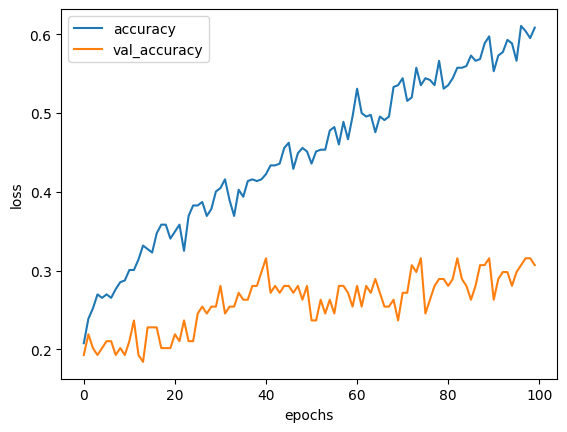

In [14]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['accuracy', 'val_accuracy'])
plt.show()

In [19]:
# 확인용도
a = model.predict(train_input[:10])
print(a)
[np.where(i == max(i)) for i in a]

1/1 [==============================] - 0s 268ms/step
[[0.7267179  0.10398609 0.0523304  0.04494438 0.03076617 0.04125505]
 [0.05695263 0.01763987 0.06243135 0.14031208 0.07629867 0.6463654 ]
 [0.01124902 0.03177698 0.05896228 0.5818754  0.11619423 0.19994205]
 [0.15084083 0.42219305 0.27653888 0.07305369 0.04681708 0.03055642]
 [0.05286257 0.3138085  0.15245955 0.17915887 0.23336633 0.06834419]
 [0.14846002 0.16574082 0.31067    0.11331952 0.15567294 0.10613669]
 [0.08196985 0.16144016 0.18747449 0.31898138 0.18174672 0.06838741]
 [0.18439987 0.1598644  0.21404675 0.29847294 0.11481291 0.02840319]
 [0.01765577 0.01378268 0.0522525  0.20625757 0.11468669 0.59536487]
 [0.06658089 0.20288849 0.17080306 0.24372353 0.23260619 0.08339784]]


[(array([0]),),
 (array([5]),),
 (array([3]),),
 (array([1]),),
 (array([1]),),
 (array([2]),),
 (array([3]),),
 (array([3]),),
 (array([5]),),
 (array([3]),)]

In [20]:
# 여기랑 비슷한지 보기
train_target[:10]

,분류클래스
703,0
92,5
243,3
590,1
418,2
351,2
251,3
220,3
86,5
578,1


### test data 확인용도

In [21]:
model.predict(test_input[:5])

1/1 [==============================] - 0s 12ms/step


array([[0.0948768 , 0.26277965, 0.30538338, 0.18768129, 0.11542004,
        0.03385882],
       [0.02022928, 0.00542532, 0.03850177, 0.08405185, 0.07135701,
        0.7804347 ],
       [0.16296823, 0.23148777, 0.24868111, 0.16225803, 0.0588183 ,
        0.13578658],
       [0.03909819, 0.17341726, 0.20871975, 0.24741262, 0.14234203,
        0.18901016],
       [0.27526197, 0.14295895, 0.3154704 , 0.02316443, 0.17057785,
        0.07256637]], dtype=float32)

In [22]:
test_target[:5]

,분류클래스
435,2
585,1
437,2
190,4
173,4
